**线形神经网络**

@ Follow: "动手学深度学习-第三章 线性神经网络"

In [1]:
import random
import torch
from d2l import torch as d2l

---
# 线性回归-从0开始

## 生成模拟数据集

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.2585, -1.9823]) 
label: tensor([10.4311])


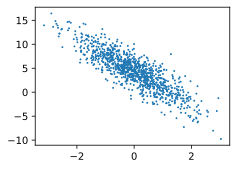

In [7]:
# 观察到特征和标签之间的线性关系
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

## 小批量读取数据

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [31]:
batch_size = 9
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0090, -0.3532],
        [-0.2739, -1.6162],
        [-1.3713,  1.0053],
        [ 0.7690,  0.3271],
        [-0.3686, -0.7495],
        [-0.7843, -1.0896],
        [ 4.0502,  1.2847],
        [-0.3216,  0.6900],
        [ 1.8210,  0.1955]]) 
 tensor([[ 5.3750],
        [ 9.1441],
        [-1.9659],
        [ 4.6304],
        [ 6.0142],
        [ 6.3337],
        [ 7.9388],
        [ 1.2065],
        [ 7.1809]])


## 定义模型、损失函数、优化算法

In [32]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):
    """
    Minibatch stochastic gradient descent.

    :params: A list of parameters to optimize.
    :lr: The learning rate.
    :batch_size: The number of examples in each minibatch.
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练模型

In [35]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 超参数
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.015627
epoch 2, loss 0.000059
epoch 3, loss 0.000045


## 模型评估

In [36]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0010, -0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0002], grad_fn=<RsubBackward1>)


---
# 线形回归-简洁实现